In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('Winning', 'ybn1d4RcS3nKQCa4Wz54')
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')
import plotly.plotly as py





In [224]:
# import cufflinks as cf

In [225]:
# ! pip install cufflinks --upgrade

In [226]:
# print(cf.__version__)

In [227]:
start_date='2016-10-10'

In [228]:

real_daily=get_price('510050.XSHG', start_date, end_date='2017-01-17', frequency='1d' )
r=real_daily.copy()
r.shape

(71, 11)

# 1 data prepare





### $$
SMA= \frac {c_t+c_{t-1}+...+c_{t-9}}{10}
$$

In [229]:
SMA=real_daily['close'].rolling(10).mean()
r.insert(0,'SMA',SMA)

In [230]:
r.head(11)

,SMA,open,close,high,low,total_turnover,volume,acc_net_value,unit_net_value,discount_rate,limit_up,limit_down
2016-10-10,NaN,2.1976,2.2133,2.2182,2.1947,257341662.0,114135834.0,2.9510,2.2084,0.2215,2.4060,1.9687
2016-10-11,NaN,2.2133,2.2162,2.2191,2.2094,301259065.0,133111593.0,2.9588,2.2142,0.0884,2.4344,1.9921
2016-10-12,NaN,2.2113,2.2084,2.2123,2.2054,232606505.0,103010776.0,2.9491,2.2064,0.0887,2.4383,1.9951
2016-10-13,NaN,2.2054,2.2084,2.2142,2.2054,176956364.0,78409711.0,2.9500,2.2074,0.0443,2.4295,1.9872
2016-10-14,NaN,2.2084,2.2172,2.2221,2.2025,258723924.0,114417097.0,2.9598,2.2152,0.0883,2.4295,1.9872
2016-10-17,NaN,2.2201,2.2015,2.2201,2.1976,274697510.0,121543726.0,2.9403,2.1986,0.1335,2.4393,1.9951
2016-10-18,NaN,2.1986,2.2328,2.2348,2.1976,382795422.0,168908806.0,2.9745,2.2279,0.2196,2.4217,1.9814
2016-10-19,NaN,2.2328,2.2299,2.2387,2.2270,253195091.0,110999220.0,2.9725,2.2260,0.1758,2.4559,2.0097
2016-10-20,NaN,2.2289,2.2309,2.2358,2.2270,235931475.0,103505157.0,2.9745,2.2279,0.1318,2.4530,2.0068
2016-10-21,2.22042,2.2309,2.2456,2.2524,2.2260,407072522.0,177779758.0,2.9951,2.2456,NaN,2.4540,2.0078


## Weighted Moving Average
$$
WMA=\frac{10c_t + 9c_{t-1}+...+c_{t-9}}{10 + 9 + ...+1}
$$

In [231]:
window=list(np.linspace(1,10,num=10))
WMA=real_daily['close'].rolling(win_type='boxcar',window=window,axis=0).mean()
r.insert(0,'WMA',WMA)
r.head(11)

,WMA,SMA,open,close,high,low,total_turnover,volume,acc_net_value,unit_net_value,discount_rate,limit_up,limit_down
2016-10-10,NaN,NaN,2.1976,2.2133,2.2182,2.1947,257341662.0,114135834.0,2.9510,2.2084,0.2215,2.4060,1.9687
2016-10-11,NaN,NaN,2.2133,2.2162,2.2191,2.2094,301259065.0,133111593.0,2.9588,2.2142,0.0884,2.4344,1.9921
2016-10-12,NaN,NaN,2.2113,2.2084,2.2123,2.2054,232606505.0,103010776.0,2.9491,2.2064,0.0887,2.4383,1.9951
2016-10-13,NaN,NaN,2.2054,2.2084,2.2142,2.2054,176956364.0,78409711.0,2.9500,2.2074,0.0443,2.4295,1.9872
2016-10-14,NaN,NaN,2.2084,2.2172,2.2221,2.2025,258723924.0,114417097.0,2.9598,2.2152,0.0883,2.4295,1.9872
2016-10-17,NaN,NaN,2.2201,2.2015,2.2201,2.1976,274697510.0,121543726.0,2.9403,2.1986,0.1335,2.4393,1.9951
2016-10-18,NaN,NaN,2.1986,2.2328,2.2348,2.1976,382795422.0,168908806.0,2.9745,2.2279,0.2196,2.4217,1.9814
2016-10-19,NaN,NaN,2.2328,2.2299,2.2387,2.2270,253195091.0,110999220.0,2.9725,2.2260,0.1758,2.4559,2.0097
2016-10-20,NaN,NaN,2.2289,2.2309,2.2358,2.2270,235931475.0,103505157.0,2.9745,2.2279,0.1318,2.4530,2.0068
2016-10-21,2.225498,2.22042,2.2309,2.2456,2.2524,2.2260,407072522.0,177779758.0,2.9951,2.2456,NaN,2.4540,2.0078



### $$
Momentum=c_t-c_{t-9}
$$

In [232]:
window=[-1,0,0,0,0,0,0,0,0,1]
MOM=real_daily['close'].rolling(win_type='boxcar',window=window,axis=0).sum()
# =real_daily['close'].rolling(win_type='boxcar',window=window,axis=0).mean()
r.insert(0,'MOM',MOM)
r.head(12).iloc[:,:6]

,MOM,WMA,SMA,open,close,high
2016-10-10,NaN,NaN,NaN,2.1976,2.2133,2.2182
2016-10-11,NaN,NaN,NaN,2.2133,2.2162,2.2191
2016-10-12,NaN,NaN,NaN,2.2113,2.2084,2.2123
2016-10-13,NaN,NaN,NaN,2.2054,2.2084,2.2142
2016-10-14,NaN,NaN,NaN,2.2084,2.2172,2.2221
2016-10-17,NaN,NaN,NaN,2.2201,2.2015,2.2201
2016-10-18,NaN,NaN,NaN,2.1986,2.2328,2.2348
2016-10-19,NaN,NaN,NaN,2.2328,2.2299,2.2387
2016-10-20,NaN,NaN,NaN,2.2289,2.2309,2.2358
2016-10-21,0.0323,2.225498,2.22042,2.2309,2.2456,2.2524






### Stochastic k%
$$
Stok=  \frac{c_t-ll_{t-9}}{hh_{t-9}-ll_{t-9}}  *100 ; here :ll_t,hh_t 
$$

imply the lowest low and highest high from last t days

In [233]:
y=real_daily[['close','high','low']]

hh=y.high.rolling(window=10).max()
ll=y.low.rolling(window=10).min()
# c=y.close.rolling(1).sum()

temp=pd.DataFrame(y.close).join(hh).join(ll)
temp.columns=['close', 'highest_high', 'lowest_low']
Stok=100*((temp.close-temp.lowest_low)/(temp.highest_high-temp.lowest_low))

Stok=pd.DataFrame(Stok)
Stok.columns=['Sto_k']
temp=temp.join(Stok)
 

r.insert(0,'Sto_k',temp.Sto_k)

r

,Sto_k,MOM,WMA,SMA,open,close,high,low,total_turnover,volume,acc_net_value,unit_net_value,discount_rate,limit_up,limit_down
2016-10-10,NaN,NaN,NaN,NaN,2.1976,2.2133,2.2182,2.1947,2.573417e+08,114135834.0,2.9510,2.2084,0.2215,2.4060,1.9687
2016-10-11,NaN,NaN,NaN,NaN,2.2133,2.2162,2.2191,2.2094,3.012591e+08,133111593.0,2.9588,2.2142,0.0884,2.4344,1.9921
2016-10-12,NaN,NaN,NaN,NaN,2.2113,2.2084,2.2123,2.2054,2.326065e+08,103010776.0,2.9491,2.2064,0.0887,2.4383,1.9951
2016-10-13,NaN,NaN,NaN,NaN,2.2054,2.2084,2.2142,2.2054,1.769564e+08,78409711.0,2.9500,2.2074,0.0443,2.4295,1.9872
2016-10-14,NaN,NaN,NaN,NaN,2.2084,2.2172,2.2221,2.2025,2.587239e+08,114417097.0,2.9598,2.2152,0.0883,2.4295,1.9872
2016-10-17,NaN,NaN,NaN,NaN,2.2201,2.2015,2.2201,2.1976,2.746975e+08,121543726.0,2.9403,2.1986,0.1335,2.4393,1.9951
2016-10-18,NaN,NaN,NaN,NaN,2.1986,2.2328,2.2348,2.1976,3.827954e+08,168908806.0,2.9745,2.2279,0.2196,2.4217,1.9814
2016-10-19,NaN,NaN,NaN,NaN,2.2328,2.2299,2.2387,2.2270,2.531951e+08,110999220.0,2.9725,2.2260,0.1758,2.4559,2.0097
2016-10-20,NaN,NaN,NaN,NaN,2.2289,2.2309,2.2358,2.2270,2.359315e+08,103505157.0,2.9745,2.2279,0.1318,2.4530,2.0068
2016-10-21,88.214905,0.0323,2.225498,2.22042,2.2309,2.2456,2.2524,2.2260,4.070725e+08,177779758.0,2.9951,2.2456,NaN,2.4540,2.0078


### Stochastic D%
$$
 {Sto\_d}=\frac {  \sum _{i=0}^{10-1}k_{t-i}    }   {10} 
$$


In [234]:
temp=r.Sto_k.rolling(window=10).mean()
temp=temp.rename('Sto_d')
r.insert(0,'Sto_d',temp)

In [235]:
r

,Sto_d,Sto_k,MOM,WMA,SMA,open,close,high,low,total_turnover,volume,acc_net_value,unit_net_value,discount_rate,limit_up,limit_down
2016-10-10,NaN,NaN,NaN,NaN,NaN,2.1976,2.2133,2.2182,2.1947,2.573417e+08,114135834.0,2.9510,2.2084,0.2215,2.4060,1.9687
2016-10-11,NaN,NaN,NaN,NaN,NaN,2.2133,2.2162,2.2191,2.2094,3.012591e+08,133111593.0,2.9588,2.2142,0.0884,2.4344,1.9921
2016-10-12,NaN,NaN,NaN,NaN,NaN,2.2113,2.2084,2.2123,2.2054,2.326065e+08,103010776.0,2.9491,2.2064,0.0887,2.4383,1.9951
2016-10-13,NaN,NaN,NaN,NaN,NaN,2.2054,2.2084,2.2142,2.2054,1.769564e+08,78409711.0,2.9500,2.2074,0.0443,2.4295,1.9872
2016-10-14,NaN,NaN,NaN,NaN,NaN,2.2084,2.2172,2.2221,2.2025,2.587239e+08,114417097.0,2.9598,2.2152,0.0883,2.4295,1.9872
2016-10-17,NaN,NaN,NaN,NaN,NaN,2.2201,2.2015,2.2201,2.1976,2.746975e+08,121543726.0,2.9403,2.1986,0.1335,2.4393,1.9951
2016-10-18,NaN,NaN,NaN,NaN,NaN,2.1986,2.2328,2.2348,2.1976,3.827954e+08,168908806.0,2.9745,2.2279,0.2196,2.4217,1.9814
2016-10-19,NaN,NaN,NaN,NaN,NaN,2.2328,2.2299,2.2387,2.2270,2.531951e+08,110999220.0,2.9725,2.2260,0.1758,2.4559,2.0097
2016-10-20,NaN,NaN,NaN,NaN,NaN,2.2289,2.2309,2.2358,2.2270,2.359315e+08,103505157.0,2.9745,2.2279,0.1318,2.4530,2.0068
2016-10-21,NaN,88.214905,0.0323,2.225498,2.22042,2.2309,2.2456,2.2524,2.2260,4.070725e+08,177779758.0,2.9951,2.2456,NaN,2.4540,2.0078


### Relative Strength Index (RSI)
$$
RSI = 100 - 100/(1 + RS)
$$
$$
RS=\frac{ \frac{1}{10} \sum_{i=0}^{10-1} UP_i  }{  \frac{1}{10} \sum_{i=0}^{10-1} DW_i }
$$

In [236]:
delta=r.close.diff()
UP,DW=delta.copy(),delta.copy()
UP[UP<0]=0
DW[DW>0]=0
DW=abs(DW)

up=UP.rolling(10).sum()
up=up.rename('up')
dw=DW.rolling(10).sum()
dw=dw.rename('dw')
rs=up/dw
RSI=rs.apply(lambda x : 100-100/(1+x))
r.insert(0,'RSI',RSI)

### MACD Line

MACD Line: (12-day EMA - 26-day EMA)

Signal Line: 9-day EMA of MACD Line

MACD Histogram: MACD Line - Signal Line

$$
\text { EMA: } 
S_{1}=Y_{1}
\text{; for } {\displaystyle t>1,\ \ S_{t}=\alpha \cdot Y_{t}+(1-\alpha )\cdot S_{t-1}}  
$$

In [237]:
def ema_zl(dataframeseries,com=12,window=50,**kwargs):
    if 'alpha' in kwargs.keys():
        com=(1/kwargs['alpha']) -1
        com=int(com)
    temp=dataframeseries.copy() # prevent dataframeseries from changing
    data_be_cal=temp[-window:]
    start_base=data_be_cal[:com].mean()
    data_be_cal=data_be_cal[com-1:]
    data_be_cal.iloc[0]=start_base
    data_be_cal=data_be_cal.ewm(com=com,adjust=0).mean()
    
    data_be_cal=data_be_cal.rename(data_be_cal.name+'_ema'+str(com))
    return data_be_cal

 
def macd_zl(x):
    macd=(ema_zl(x,com=12)-ema_zl(x,com=26))
    macd=macd.rename('MACD')
    return macd

        

def signal_line_zl(x):
    MACD=macd_zl(x)
    sig_line=ema_zl(MACD,com=9).rename('signal_line')
    return sig_line


def macd_histogram_zl(x):
    return (macd_zl(x)-signal_line_zl(x)).rename('macd_histogram')


In [238]:
# pd.DataFrame([macd_zl(z),signal_line_zl(z),macd_histogram_zl(z)]).T.plot()

### Larry William’s R%

%R = (Highest High - Close)/(Highest High - Lowest Low) * -100

Lowest Low = lowest low for the look-back period

Highest High = highest high for the look-back period

%R is multiplied by -100 correct the inversion and move the decimal.

The default setting for Williams %R is **14 periods**, which can be days, weeks, months or an intraday timeframe. A 14-period %R would use the most recent close, the highest high over the last 14 periods and the lowest low over the last 14 periods.

In [239]:
w_c=real_daily['close']
w_h=real_daily['high'].rolling(window=14).max().rename('high_high')
w_l=real_daily['low'].rolling(window=14).min().rename('low_low')

# w=pd.DataFrame([w_c,w_h,w_l]).T
wr=((w_h-w_c)/(w_h-w_l))*(-100)
wr=wr.rename('Willi_R')
r.insert(0,'Willi_R',wr)

### A/D (Accumulation/Distribution) Oscillator

$$
\frac{H_t-C_{t-1}}{H_t-L_t}
$$

In [240]:
ad=real_daily[['high','low']].join(real_daily['close'].shift(1).rename('close_yestoday'))
ad=((ad['high']-ad['close_yestoday']))/((ad['high']-ad['low']))
ad=ad.rename('AD')
r.insert(0,'AD',ad)


### CCI (Commodity Channel Index)

$$
cci=\frac{M_t-SM_t}{0.015D_t}
\\
\\
M_t=\frac{H_t+L_t+C_t}{3}
\\
SM_t=\frac{\sum_{i=1}^n M_{t-i+1}}{n} \text{ ,  n =14 typically }
\\
D_t=\frac{\sum_{i=0}^n |M_{t-i+1}-SM_t |}{n} \text{ ,  n =14 typically }
$$


In [405]:
cci=real_daily[['high','low','close']].copy()

M=(cci['high']+cci['low']+cci['close'])/3
M=M.rename('M')

SM=M.rolling(14).mean()
SM=SM.rename('SM')

tr=pd.DataFrame([M,SM]).T.copy()

li_st=list(tr['SM'].dropna().values)
li_st=li_st[::-1]
len(li_st)

def abs_sum_mean(rolling):
    temp=li_st.pop()
#     print(temp)
    lenth=len([i for i in rolling])
    return sum( abs(temp-i) for i in rolling)/lenth

CCI=tr['M'].rolling(14).apply(lambda x : abs_sum_mean(x))
CCI=CCI.rename('CCI')
r.insert(0,'CCI',CCI)

In [406]:
r

,CCI,AD,Willi_R,RSI,Sto_d,Sto_k,MOM,WMA,SMA,open,close,high,low,total_turnover,volume,acc_net_value,unit_net_value,discount_rate,limit_up,limit_down
2016-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1976,2.2133,2.2182,2.1947,2.573417e+08,114135834.0,2.9510,2.2084,0.2215,2.4060,1.9687
2016-10-11,NaN,0.597938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2133,2.2162,2.2191,2.2094,3.012591e+08,133111593.0,2.9588,2.2142,0.0884,2.4344,1.9921
2016-10-12,NaN,-0.565217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2113,2.2084,2.2123,2.2054,2.326065e+08,103010776.0,2.9491,2.2064,0.0887,2.4383,1.9951
2016-10-13,NaN,0.659091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2054,2.2084,2.2142,2.2054,1.769564e+08,78409711.0,2.9500,2.2074,0.0443,2.4295,1.9872
2016-10-14,NaN,0.698980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2084,2.2172,2.2221,2.2025,2.587239e+08,114417097.0,2.9598,2.2152,0.0883,2.4295,1.9872
2016-10-17,NaN,0.128889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2201,2.2015,2.2201,2.1976,2.746975e+08,121543726.0,2.9403,2.1986,0.1335,2.4393,1.9951
2016-10-18,NaN,0.895161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1986,2.2328,2.2348,2.1976,3.827954e+08,168908806.0,2.9745,2.2279,0.2196,2.4217,1.9814
2016-10-19,NaN,0.504274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2328,2.2299,2.2387,2.2270,2.531951e+08,110999220.0,2.9725,2.2260,0.1758,2.4559,2.0097
2016-10-20,NaN,0.670455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2289,2.2309,2.2358,2.2270,2.359315e+08,103505157.0,2.9745,2.2279,0.1318,2.4530,2.0068
2016-10-21,NaN,0.814394,NaN,NaN,NaN,88.214905,0.0323,2.225498,2.22042,2.2309,2.2456,2.2524,2.2260,4.070725e+08,177779758.0,2.9951,2.2456,NaN,2.4540,2.0078


In [252]:
e=r.close
e.shape

(71,)

In [255]:
real_daily['close'][:12]

2016-10-10    2.2133
2016-10-11    2.2162
2016-10-12    2.2084
2016-10-13    2.2084
2016-10-14    2.2172
2016-10-17    2.2015
2016-10-18    2.2328
2016-10-19    2.2299
2016-10-20    2.2309
2016-10-21    2.2456
2016-10-24    2.2739
2016-10-25    2.2690
Name: close, dtype: float64

In [256]:
window

[-1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [257]:

x=pd.DataFrame(np.linspace(1,12,num=12),columns=['p'],index=pd.date_range(start='1/1/2017',periods=12,freq='D')    )

x

,p
2017-01-01,1.0
2017-01-02,2.0
2017-01-03,3.0
2017-01-04,4.0
2017-01-05,5.0
2017-01-06,6.0
2017-01-07,7.0
2017-01-08,8.0
2017-01-09,9.0
2017-01-10,10.0


In [258]:
ser = pd.Series(x.p.values, index=pd.date_range('1/1/2017', periods=12))


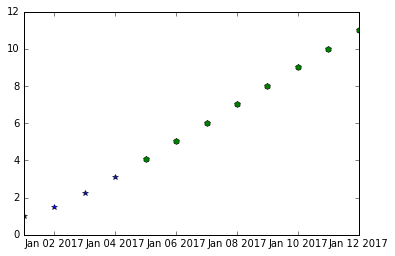

In [259]:
# plt.plot(x,'r')
plt.plot(x.ewm(alpha=.5, adjust=0).mean(),'*')
plt.plot(x.ewm(alpha=.5, adjust=0,min_periods=5).mean(),'h')

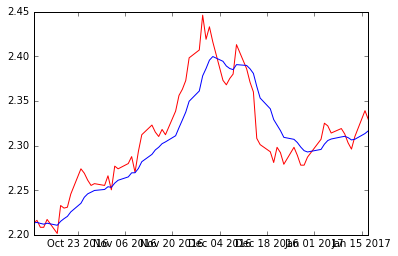

In [260]:
z=real_daily['close']
ex=z.ewm(alpha=0.2,adjust=0)
plt.plot(z,'r')
plt.plot(ex.mean(),'b')
# plt.plot(z.ewm(alpha=0.5,adjust=0).mean(),'k')

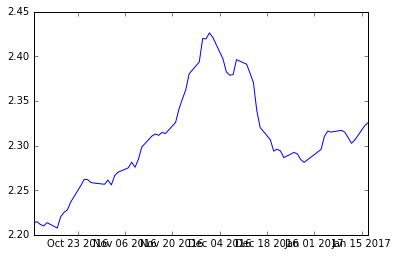

In [261]:
z=real_daily['close']
ex=z.ewm(com=1,adjust=0)
# plt.plot(z,'r')
plt.plot(ex.mean(),'b')

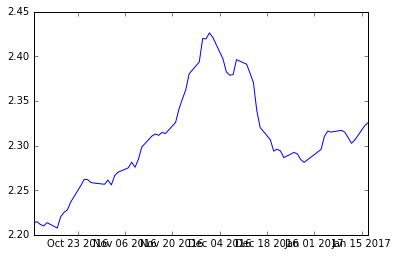

In [262]:
plt.plot(ema_zl(z,com=1,window=100000))

# plt.plot(z.ewm(alpha=0.5,adjust=0).mean(),'k')

In [263]:
# ema(z,com=1,window=100000)==ex.mean()

In [264]:
# pd.DataFrame(ema(z,com=1,window=100000)).join(pd.DataFrame(ex.mean()),rsuffix='new')


In [265]:
x.ewm(alpha=.2,adjust=0).mean()

,p
2017-01-01,1.000000
2017-01-02,1.200000
2017-01-03,1.560000
2017-01-04,2.048000
2017-01-05,2.638400
2017-01-06,3.310720
2017-01-07,4.048576
2017-01-08,4.838861
2017-01-09,5.671089
2017-01-10,6.536871


In [267]:
pd.date_range(start='1/1/2017',periods=12)#,freq='D'

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12'],
              dtype='datetime64[ns]', freq='D')

In [268]:
data=[go.Scatter(y=z.values,x=z.index,name='real price'),
      go.Scatter(y=ema_zl(z),x=ema_zl(z).index,name='ema12',mode='lines+markers')
      
     ]
url=py.plot(data)
tls.embed(url)

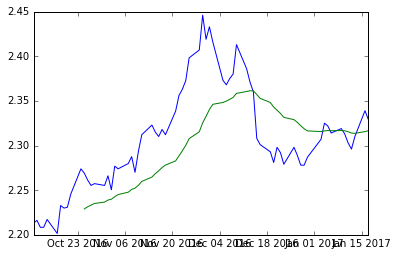

In [269]:
plt.plot(z)
plt.plot(ema_zl(z,window=200))

In [323]:
l=np.linspace(1,12,num=12)*100
# l=[10000,20000,30000,40000,50000,600000,700000,800000,90000]
l=list(l)
l=l[::-1]
# l.append(0)
l=[int(i) for i in l]

l


[1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]

In [348]:
xx=x[:4]
xx

,p
2017-01-01,1.0
2017-01-02,2.0
2017-01-03,3.0
2017-01-04,4.0


In [345]:
xx.rolling(2).apply(lambda x: dif(x))

100
2
200
2
300
2


,p
2017-01-01,NaN
2017-01-02,101.5
2017-01-03,202.5
2017-01-04,303.5


In [359]:
l=np.linspace(1,12,num=12)*100
# l=[10000,20000,30000,40000,50000,600000,700000,800000,90000]
l=list(l)
l=l[::-1]
# l.append(0)
l=[int(i) for i in l]



def abs_mean(rolling):
    temp=l.pop()
#     print(temp)
    lenth=len([i for i in rolling])
    return sum( abs(temp+i) for i in rolling)/lenth
l



[1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]

In [360]:
xx

,p
2017-01-01,1.0
2017-01-02,2.0
2017-01-03,3.0
2017-01-04,4.0


In [361]:
xx.rolling(2).apply(lambda x : abs_mean(x))

100
200
300


,p
2017-01-01,NaN
2017-01-02,101.5
2017-01-03,202.5
2017-01-04,303.5


In [386]:
# tr[:16]

In [394]:
ans.ix['2016/10/28']

0.021414285714285736